In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def game(capital):
    
    is_end = False
    bankrupt = False
    state = capital
    state_path = []
    bet = 1
    bet_path = []
    e_prev = 1
    
    while is_end == False:
        state_path.append(state)
        e = np.random.random()
        
        if e_prev < 0.5:
            bet = 2*bet
        else:
            bet = 1
        bet_path.append(bet)
        
        if e >= 0.5:
            state += bet
        else:
            state -= bet

        if state <= 0:
            is_end = True
            bankrupt = True
        elif state >= 100:
            is_end = True
        
        e_prev = e
        
    return state_path, bet_path, bankrupt

In [39]:
p_head = 0.4
e = 1e-10
states = range(1, 100)
v = np.zeros(99)
policy = np.zeros(99)
converged = False

# Value iteration
while not converged:
    delta = 0
    for state in states:
        actions = range(1, state+1)
        q_list = np.zeros(len(actions))
        for ind, bet in enumerate(actions):
            if state+bet >= 100:
                if state == bet:
                    q_list[ind] = p_head*1 + (1-p_head)*(-1)
                else:
                    q_list[ind] = (1-p_head)*v[state-bet-1] + p_head*1
            elif state == bet:
                q_list[ind] = p_head*v[state+bet-1] + (1-p_head)*(-1)
            else:
                q_list[ind] = (1-p_head)*v[state-bet-1] + p_head*v[state+bet-1]
        delta = max(delta, abs(v[state-1] - np.max(q_list)))
        v[state-1] = np.max(q_list)
        policy[state-1] = actions[np.argmax(np.round(q_list, 5))]
    if delta < e:
        converged = True

In [40]:
policy

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12.,
       11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 25.,  1.,
        2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12., 11.,
       10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 50.,  1.,  2.,
        3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12., 11., 10.,
        9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 25.,  1.,  2.,  3.,
        4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12., 11., 10.,  9.,
        8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

In [23]:
def game2(capital, policy):
    
    is_end = False
    bankrupt = False
    state = capital
    state_path = []
    bet_path = []
    
    while is_end == False:
        bet = policy[capital-1]
        state_path.append(state)
        e = np.random.random()        
        if e >= 0.5:
            state += bet
        else:
            state -= bet

        if state <= 0:
            is_end = True
            bankrupt = True
        elif state >= 100:
            is_end = True
        
        
    return state_path, bet_path, bankrupt

In [29]:
def game3(capital):
    
    is_end = False
    bankrupt = False
    state = capital
    state_path = []
    bet_path = []
    bet = 1
    
    while is_end == False:
        state_path.append(state)
        e = np.random.random()        
        if e >= 0.5:
            state += bet
        else:
            state -= bet

        if state <= 0:
            is_end = True
            bankrupt = True
        elif state >= 100:
            is_end = True
        
        
    return state_path, bet_path, bankrupt

In [24]:
x = []

for c in range(1, 100):
    b = []
    for i in range(10000):
        state_path, bet_path, bankrupt = game(c)
        b.append(bankrupt)
    p = sum(b)/10000
    x.append(p)

In [31]:
y = []

for c in range(1, 100):
    b = []
    for i in range(10000):
        state_path, bet_path, bankrupt = game2(c, policy)
        b.append(bankrupt)
    p = sum(b)/10000
    y.append(p)

In [35]:
%%time
z = []

for c in range(1, 100):
    b = []
    for i in range(5000):
        state_path, bet_path, bankrupt = game3(c)
        b.append(bankrupt)
    p = sum(b)/5000
    z.append(p)

CPU times: user 5min 34s, sys: 453 ms, total: 5min 35s
Wall time: 5min 35s


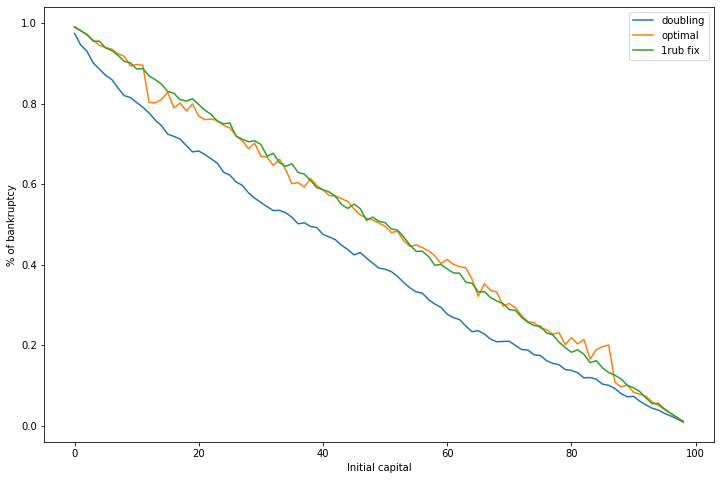

In [36]:
plt.figure(figsize=(12, 8))
plt.plot(x, label='doubling')
plt.plot(y, label='optimal')
plt.plot(z, label='1rub fix')

plt.xlabel('Initial capital')
plt.ylabel('% of bankruptcy')
plt.legend()
plt.show()

In [2]:
x = np.random.normal(size=(10, 10))

In [4]:
x.shape

(10, 10)

In [7]:
X, Y = np.mgrid[0:1:10j, 0:1:10j]

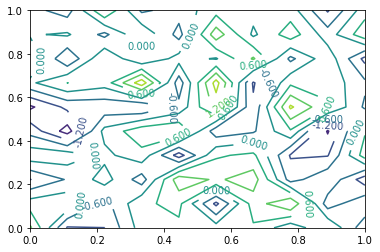

In [8]:
class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s
fig, ax = plt.subplots()
CS = ax.contour(X, Y, x)
CS.levels = [nf(val) for val in CS.levels]
ax.clabel(CS, CS.levels, inline=True, fontsize=10)
plt.show()